In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [73]:
def load_img():
    blankImg = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(blankImg, text='ABCDE', org=(50, 300), fontFace=font,
                fontScale=5, color=(255, 255, 255), thickness=35, lineType=cv2.LINE_AA)
    return blankImg


In [74]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')


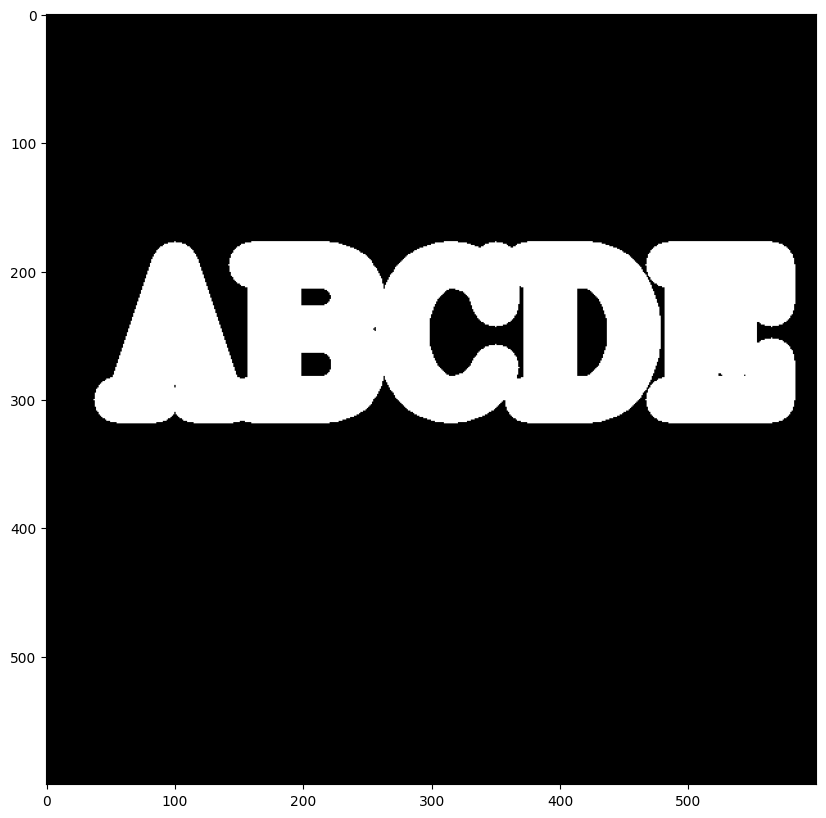

In [75]:
img = load_img()
display_img(img)

In [76]:
kernel=np.ones((5,5),dtype=np.uint8)
kernel


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

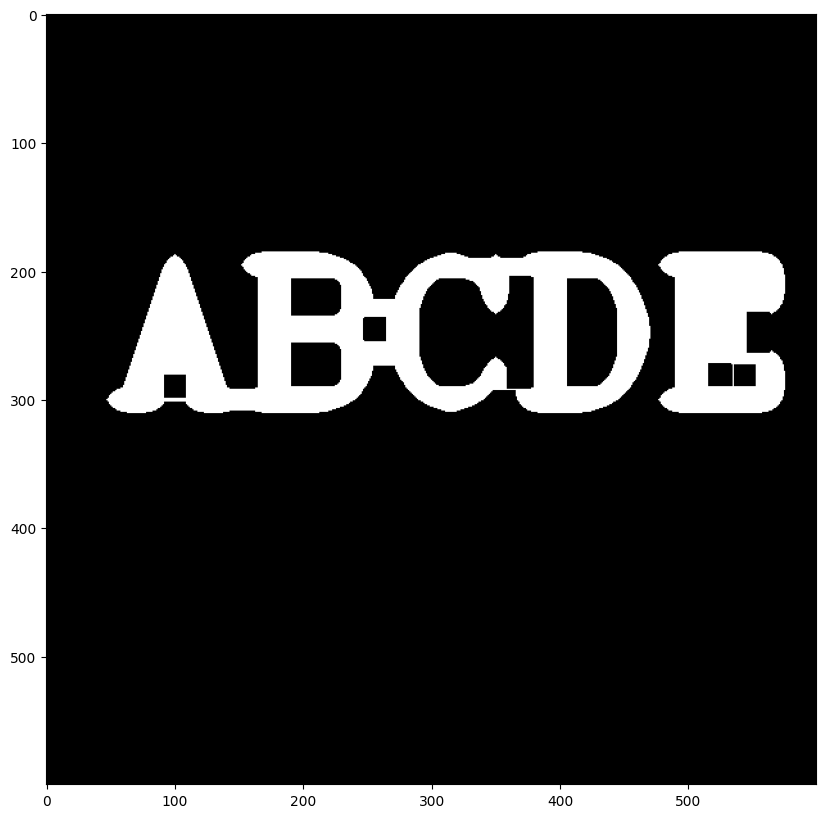

In [77]:
result=cv2.erode(img,kernel,iterations=4)
display_img(result)


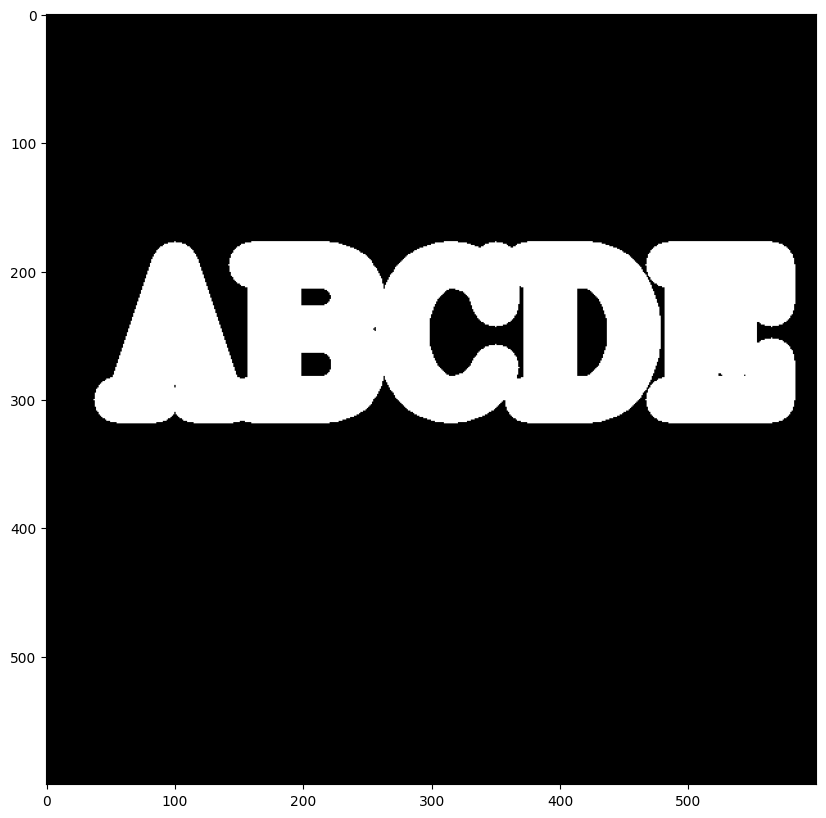

In [78]:
img = load_img()
display_img(img)


In [79]:
white_noise=np.random.randint(low=0,high=2,size=(600,600))
white_noise


array([[0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 0]])

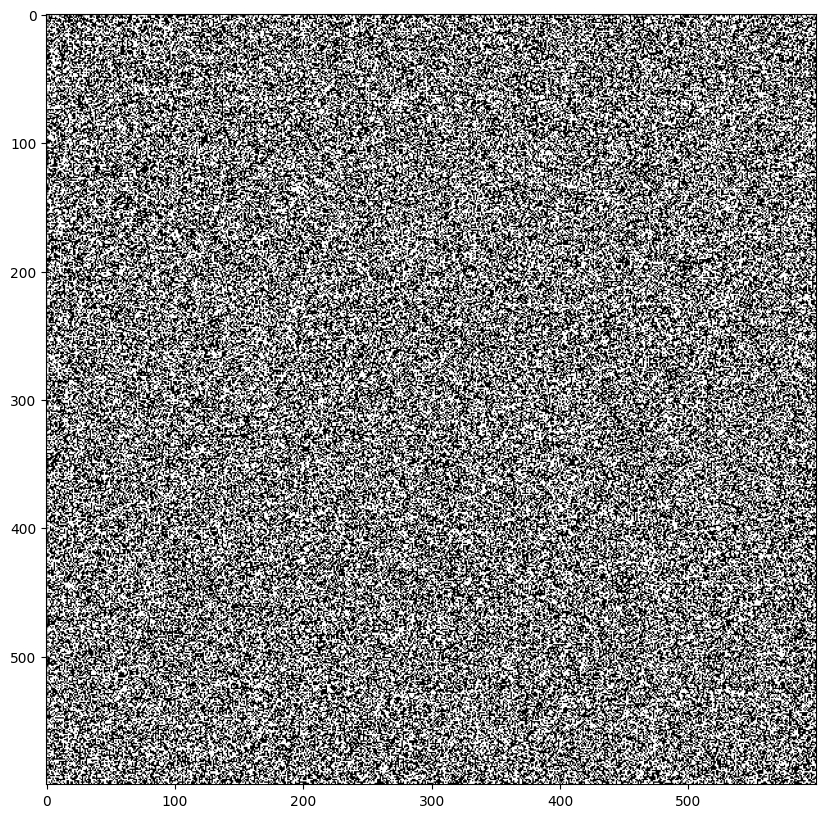

In [80]:
display_img(white_noise)


In [81]:
img.max()

255.0

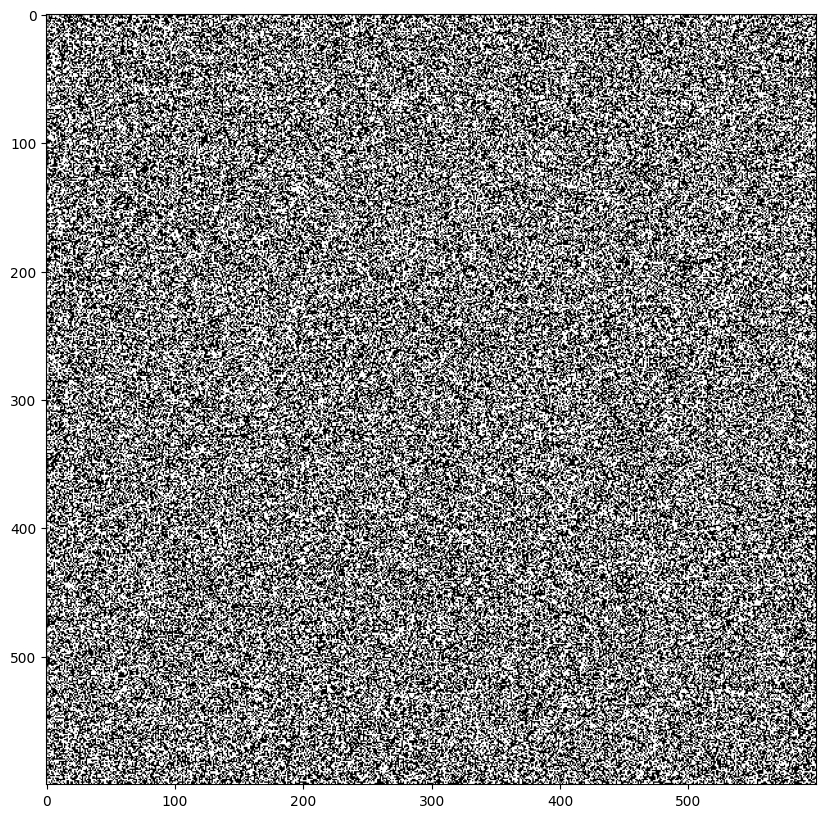

In [82]:
# converting into 0-255
white_noise=white_noise*255
display_img(white_noise)


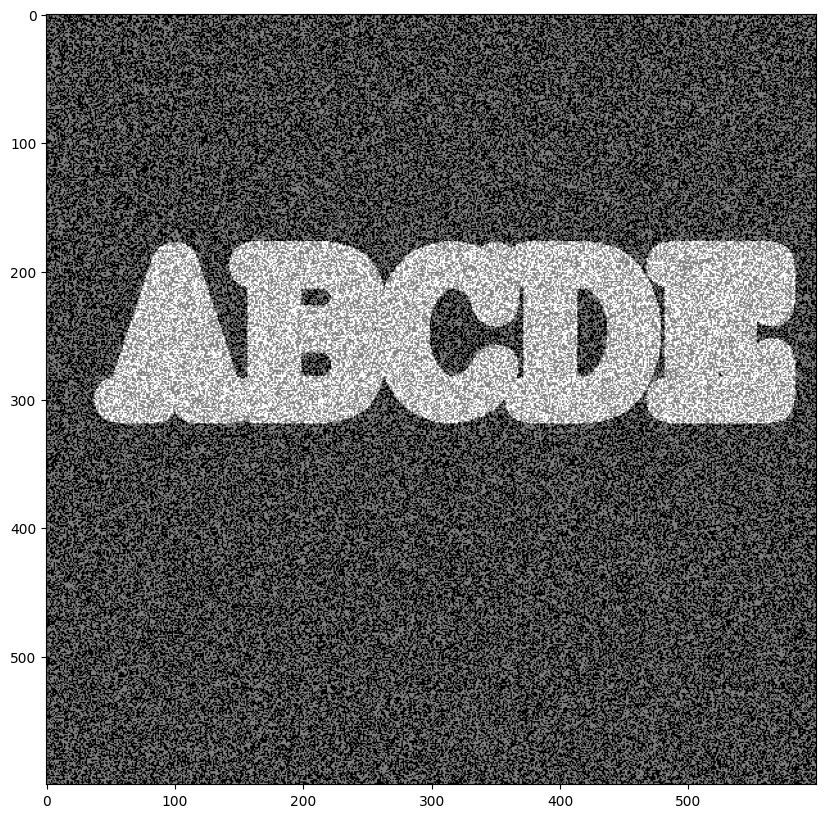

In [83]:
noise_img=white_noise+img
display_img(noise_img)


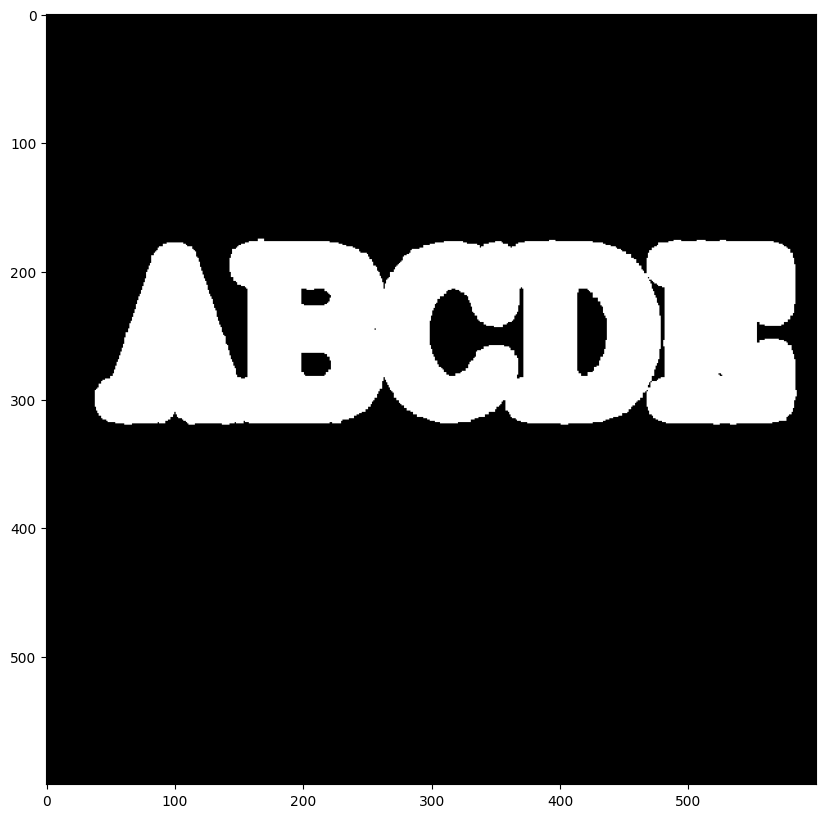

In [84]:
# IN THE ABOVE IMAGE THERE WAS BACKGROUND NOISE SO WE USE MORPH_OPEN (OPENING)
opening=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)


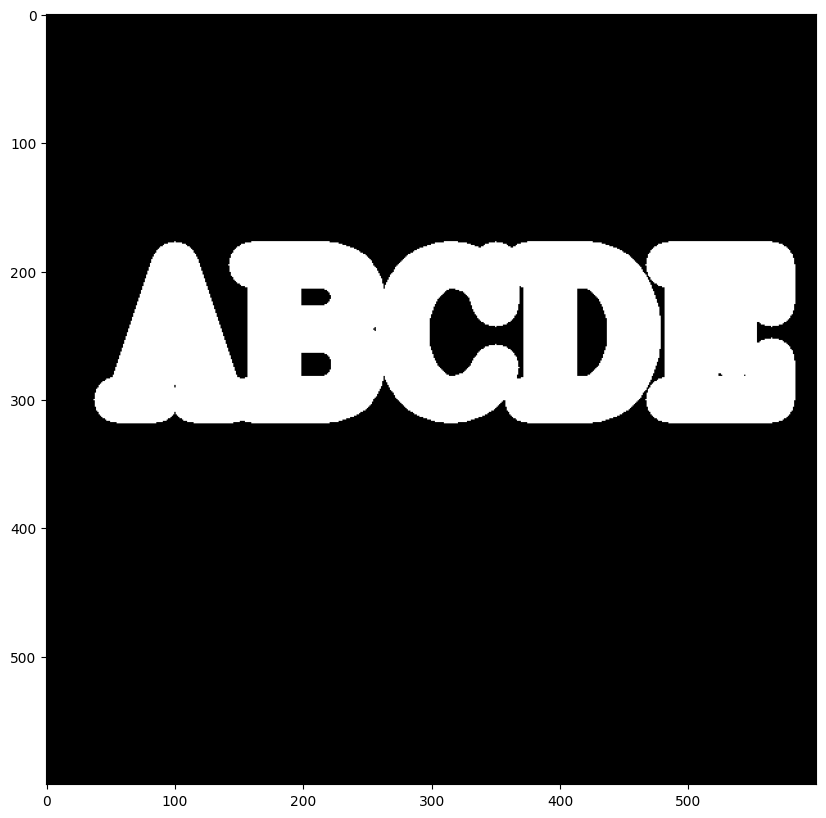

In [85]:
# NOW CREATING FOREGROUND NOISE
img = load_img()
display_img(img)


In [86]:
black_noise=np.random.randint(low=0,high=2,size=(600,600))
black_noise


array([[0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [87]:
black_noise=black_noise*-255
black_noise


array([[   0,    0, -255, ...,    0, -255,    0],
       [-255, -255,    0, ..., -255,    0, -255],
       [   0,    0, -255, ..., -255, -255, -255],
       ...,
       [   0, -255,    0, ...,    0,    0, -255],
       [   0,    0,    0, ..., -255,    0,    0],
       [-255, -255, -255, ..., -255, -255,    0]])

In [88]:
black_noise_img =img+black_noise
black_noise_img


array([[   0.,    0., -255., ...,    0., -255.,    0.],
       [-255., -255.,    0., ..., -255.,    0., -255.],
       [   0.,    0., -255., ..., -255., -255., -255.],
       ...,
       [   0., -255.,    0., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ..., -255.,    0.,    0.],
       [-255., -255., -255., ..., -255., -255.,    0.]])

In [89]:
black_noise_img[black_noise_img==-255]=0
black_noise_img


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

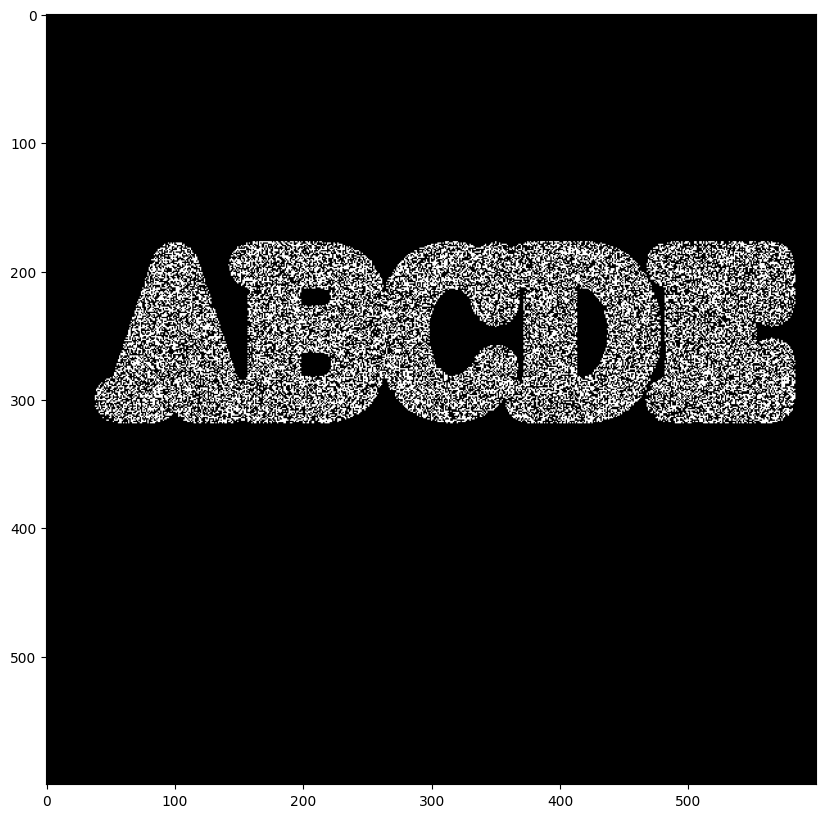

In [90]:
display_img(black_noise_img)


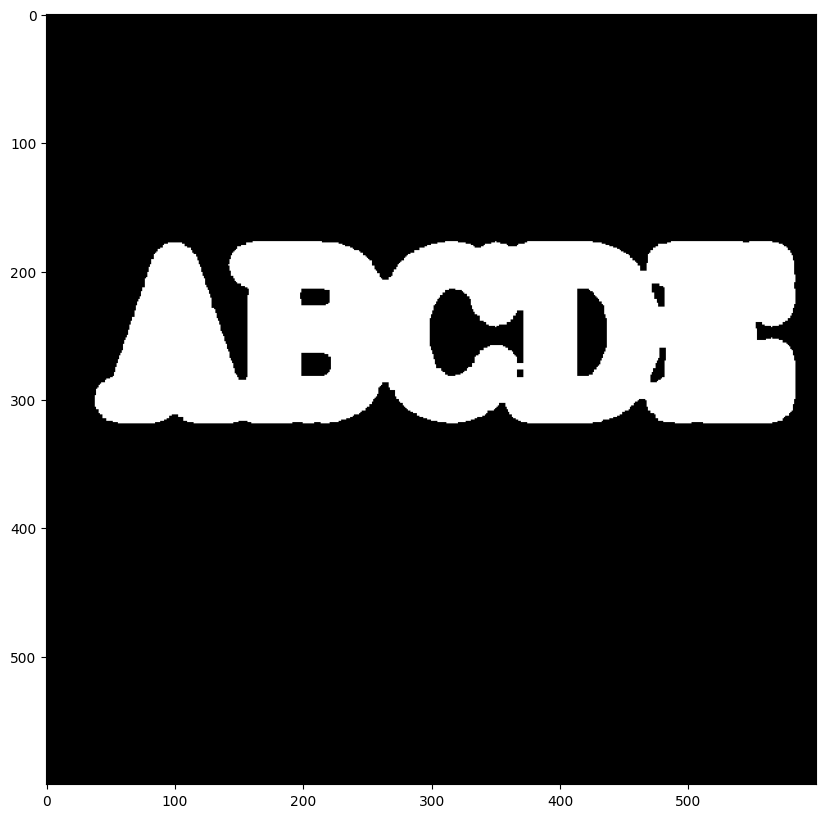

In [91]:
# IN THE ABOVE IMAGE THERE WAS FOREGROUND NOISE SO WE USE MORPH_OPEN (OPENING)
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)


# morphological gradient :-its difference betweern Erode and dilation

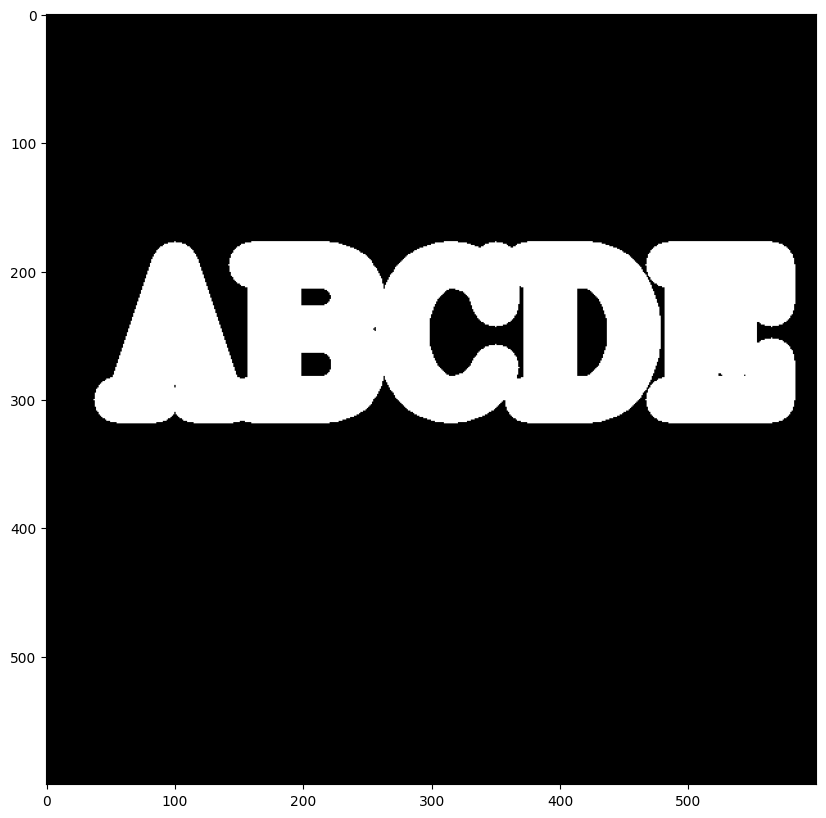

In [92]:
img = load_img()
display_img(img)


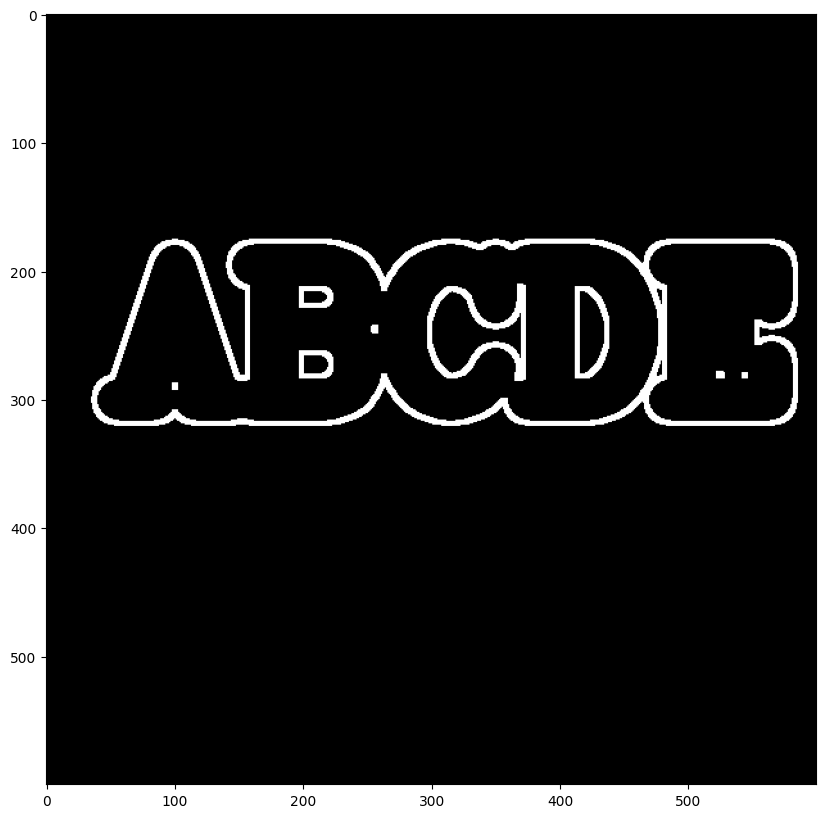

In [95]:
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)
